In [1]:
%load_ext autoreload
%autoreload 2

In [113]:
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (4,2.7)

from NormalizingFlows.src.transforms.continuous_piecewise import ContinuousPiecewise


In [114]:
z = torch.linspace(-5,10, 10000)[:,None]
trans = ContinuousPiecewise(a_param=(lambda x: x**2), beta=2)

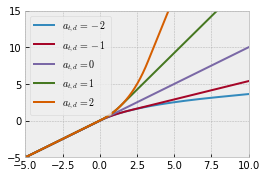

In [115]:
b = 0
a_s = [-2,-1, 0, 1,2]
for a in a_s:
    param = [torch.ones_like(z) * a, torch.zeros_like(z) * b]
    x,_=trans.training_direction(z, param)
    plt.plot(z[:,0],x[:,0], label=f'$a_{{t,d}}={a}$')

plt.legend(loc='upper left')
plt.ylim(-5,15)
plt.xlim(-5,10)
plt.savefig('a_plot.pdf')

In [116]:
z_2 = torch.linspace(50,100, 10000)[:,None]

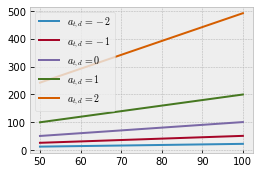

In [117]:
b = 0
a_s = [-2,-1, 0, 1,2]
for a in a_s:
    param = [torch.ones_like(z_2) * a, torch.zeros_like(z_2) * b]
    x,_=trans.training_direction(z_2, param)
    plt.plot(z_2[:,0],x[:,0], label=f'$a_{{t,d}}={a}$')

plt.legend()
plt.savefig('lin_a_plot.pdf')

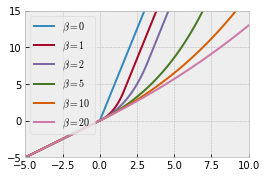

In [119]:
b = 0
a = 2
beta_s = [0,1,2,5,10,20]
for beta in beta_s:
    param = [torch.ones_like(z) * a, torch.zeros_like(z) * b]
    trans.beta = beta
    x,_=trans.training_direction(z, param)
    plt.plot(z[:,0],x[:,0], label=f'$\\beta={beta}$')

plt.legend(loc='upper left')
plt.ylim(-5,15)
plt.xlim(-5,10)
plt.savefig('beta_plot.pdf')
